In [1]:
%load_ext autoreload
%autoreload 2

In [2]:

import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from json import load
import tifffile
from tqdm import tqdm
from skimage.draw import polygon
from matplotlib import rcParams
import glasbey

palette = {
    "green": "#558150",
    "beige": "#F1E2C3",
    "brown": "#A7785A",
    "pink": "#F0D6C2",
    "black": "#0E0E0E",
}

rcParams['font.family'] = 'sans-serif'
rcParams['figure.facecolor'] = "#FFFFFF00"
rcParams['axes.facecolor'] = "#FFFFFF00"
rcParams['legend.framealpha'] = 0.2
rcParams['axes.edgecolor'] = palette["black"]
rcParams['axes.labelcolor'] = palette["black"]
rcParams['xtick.color'] = palette["black"]
rcParams['ytick.color'] = palette["black"]
rcParams['text.color'] = palette["black"]
rcParams['axes.titlecolor'] = palette["black"]

s_palette = sns.cubehelix_palette(as_cmap=True)
g_palette = glasbey.create_palette()

In [3]:
from skimage.feature import blob_dog, blob_log, blob_doh
from numpy import sqrt

[[579.          54.           5.        ]
 [458.          31.           5.        ]
 [577.          98.           5.        ]
 [478.          16.           5.        ]
 [243.           0.           5.        ]
 [307.          69.           7.77777778]
 [117.         380.           5.        ]
 [431.         354.           5.        ]
 [599.          13.           5.        ]
 [351.          16.           5.        ]
 [140.         385.           5.        ]
 [580.         352.          10.55555556]
 [472.          72.           7.77777778]
 [120.          73.           7.77777778]
 [372.         367.           5.        ]
 [ 97.          60.           5.        ]
 [465.           0.           5.        ]
 [509.          58.           5.        ]
 [599.          98.           7.77777778]
 [161.           0.           5.        ]
 [588.          67.           5.        ]
 [235.         376.           5.        ]
 [110.         349.          10.55555556]
 [365.          49.           5.  

KeyboardInterrupt: 

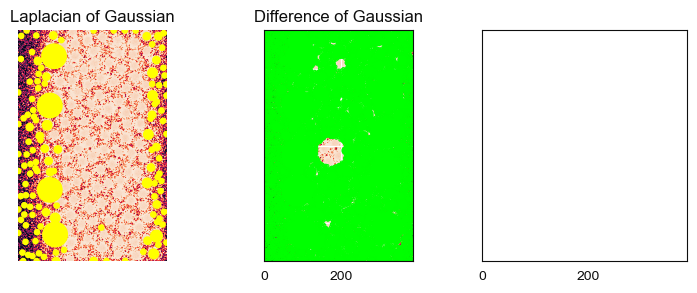

In [22]:
datapath = Path(r"D:\Tracking\NucleiTracking\data\interim\confocal\zld")
rawpath = datapath / "MAX_63X-bgs.tif"
raw = tifffile.imread(rawpath)

image = raw[50]
image = image*255/image.max()

blobs_log = blob_log(image, min_sigma=5, max_sigma=30, num_sigma=10, threshold_rel=0.5)
print(blobs_log)

# # Compute radii in the 3rd column.
# blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)
# 
# blobs_dog = blob_dog(image, max_sigma=30, threshold=0.1)
# blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)
# 
# blobs_doh = blob_doh(image, max_sigma=30, threshold=0.01)

blobs_list = [blobs_log, blobs_dog, blobs_doh]
colors = ['yellow', 'lime', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian', 'Determinant of Hessian']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(image)
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=True)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()